# 1. Setup and Load Data

## 1.1 Install Dependencies and Setup

In [1]:
%pip install tensorflow opencv-python==4.5.5.64 matplotlib


  Using cached opencv_python-4.5.5.64-cp36-abi3-win_amd64.whl.metadata (18 kB)
   ---------------------------------------- 0.0/35.4 MB ? eta -:--:--
    --------------------------------------- 0.8/35.4 MB 5.6 MB/s eta 0:00:07
   -- ------------------------------------- 2.1/35.4 MB 5.6 MB/s eta 0:00:06
   ---- ----------------------------------- 3.7/35.4 MB 6.2 MB/s eta 0:00:06
   ----- ---------------------------------- 5.2/35.4 MB 6.5 MB/s eta 0:00:05
   ------- -------------------------------- 6.8/35.4 MB 6.8 MB/s eta 0:00:05
   --------- ------------------------------ 8.7/35.4 MB 7.0 MB/s eta 0:00:04
   ----------- ---------------------------- 10.0/35.4 MB 6.8 MB/s eta 0:00:04
   ------------- -------------------------- 11.5/35.4 MB 6.9 MB/s eta 0:00:04
   -------------- ------------------------- 13.1/35.4 MB 7.0 MB/s eta 0:00:04
   ---------------- ----------------------- 14.9/35.4 MB 7.1 MB/s eta 0:00:03
   ------------------ --------------------- 16.5/35.4 MB 7.2 MB/s eta 0:00:03

  You can safely remove it manually.


In [12]:
%pip install "numpy<2" 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import os

## 1.2 Remove funky images

In [133]:
import cv2
import imghdr

In [134]:
data_dir = 'data'

In [135]:
os.listdir(os.path.join(data_dir, 'happy'))

['0-truly-happy-people.jpg',
 '05-12-21-happy-people.jpg',
 '1000_F_257759165_m9yldegJvu8gPi8lOHDM0mwP8LejhmKK.jpg',
 '116-1168650_picture-of-a-group-of-happy-people-hugging.png',
 '1280px-Happy_People.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-r.jpeg',
 '227-2271651_picture-of-a-group-of-happy-people-hugging.png',
 '256-2564633_happy-people-clip-art.png',
 '29-291730_happy-people-image-happy-people-transparent-backgr.png',
 '2983960_stock-photo-happy-people.jpg',
 '31b30073bf691224a4814d0495a2fee712daad529d73326f095cf0d22fdd.png',
 '323-3239647_happy-people-png-transparent-png.png',
 '330-3302286_happy-cartoon-person-clipart-transparent-png-ima.png',
 '35438_hd.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '4-things-happy-people-dont-do-cover.png',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '6186015_stock-photo-happy-people-crowd.jpg',
 '65df254481d4ddd0c527a642_10-Common-Traits-Among-Hap

In [136]:
img_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [137]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)
                

Image not in ext list data\happy\1280px-Happy_People.jpg
Image not in ext list data\happy\67891c01e6414a49171f7cdd_670dc58a1a956551043bb21f_traitshapp.webp
Image not in ext list data\happy\bae816b4-77f0-416e-9fbf-0a7d9e4ee3ac.jpeg
Image not in ext list data\happy\getty_143919450_9706479704500104_51510.webp
Image not in ext list data\happy\getty_152414899_97046097045006_68075.webp
Image not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data\happy\Happiest-person-in-the-world-.jpg
Image not in ext list data\happy\Happy People.jpg
Image not in ext list data\happy\istock-000060800302-small-59c608af4686159f5fe597a7034d211d.jpg
Image not in ext list data\happy\istock-508455188-033183f45ba393ed4745b2dd1213c390.jpg
Image not in ext list data\sad\207249395-young-man-sitting-on-a-bench-in-the-park-sad-and-d.jpg
Image not in ext list data\sad\depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list data\sad\depression.jpg
Image not in 

# 1.3 Load Data

In [138]:
tf.data.Dataset??


Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [139]:
from matplotlib import pyplot as plt
import numpy as np

In [185]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 295 files belonging to 2 classes.


In [141]:
data_iterator = data.as_numpy_iterator()

In [142]:
data_iterator

In [143]:
batch = data_iterator.next()

In [144]:
# images as numpy array
batch[0].shape

(32, 256, 256, 3)

In [145]:
# label as numpy array
batch[1]

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

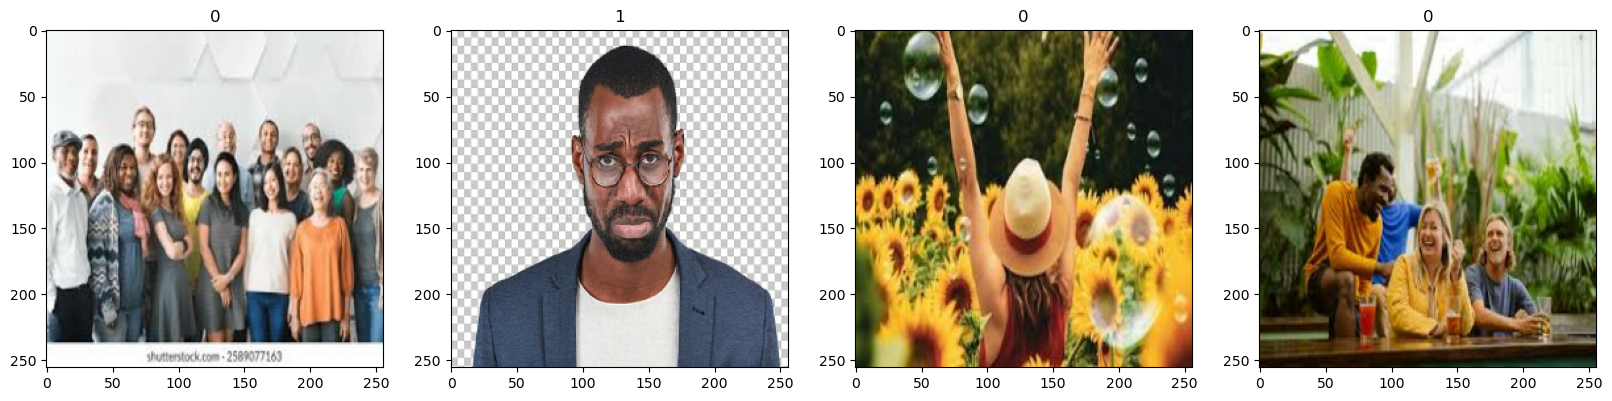

In [146]:
fix, ax = plt.subplots(ncols =4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess Data

## 2.1 Scale Data

In [186]:
data = data.map(lambda x,y : (x/255, y))

In [187]:
scaled_interator = data.as_numpy_iterator()

In [192]:
batch = scaled_interator.next()

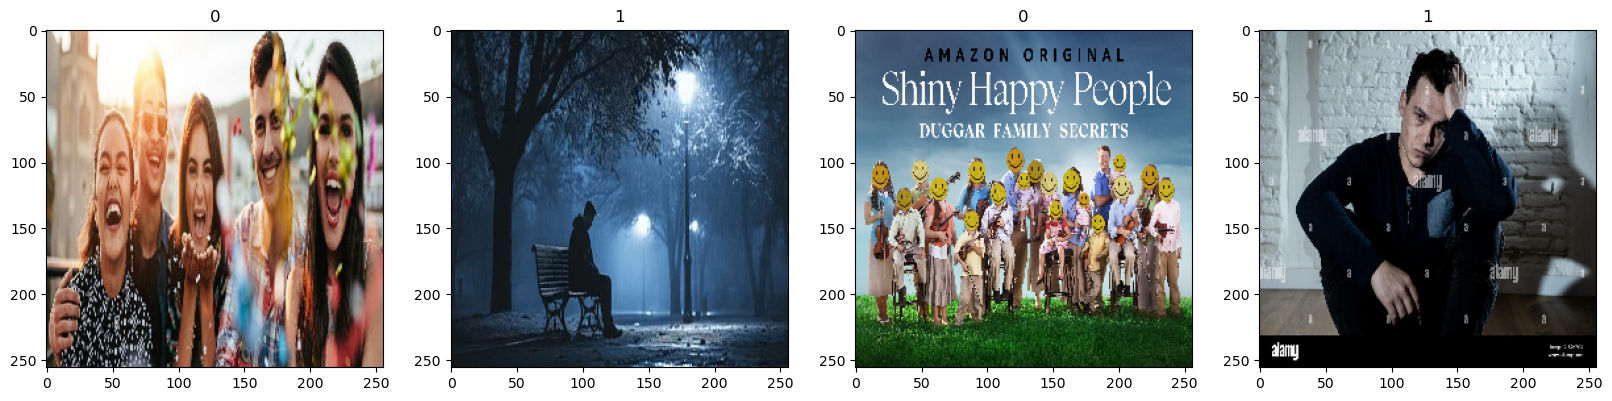

In [193]:
fix, ax = plt.subplots(ncols =4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data

In [151]:
len(data)

10

In [152]:
train_size = int(len(data)*.7)
val_size =int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [153]:
train = data.take(train_size)
val = data.skip(train_size).take(val_data)
test = data.skip(train_size + val_size).take(test_size)

In [154]:
len(test)

1

# 3. Deep Model

## 3.1 Build Deep Learning Model


In [155]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [156]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation ='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [157]:
model.compile('adam', loss= tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [158]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 16)      

## 3.2 Train

In [159]:
logdir = 'logs'

In [160]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [161]:
hist = model.fit(train, epochs = 20, validation_data= val, callbacks= [tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 13s 1s/step - loss: 0.8061 - accuracy: 0.6071 - val_loss: 0.6610 - val_accuracy: 0.6562
Epoch 2/20
7/7 [==============================] - 11s 1s/step - loss: 0.6120 - accuracy: 0.6830 - val_loss: 0.6188 - val_accuracy: 0.5938
Epoch 3/20
7/7 [==============================] - 11s 1s/step - loss: 0.4790 - accuracy: 0.7768 - val_loss: 0.5477 - val_accuracy: 0.8125
Epoch 4/20
7/7 [==============================] - 11s 1s/step - loss: 0.4705 - accuracy: 0.7634 - val_loss: 0.3074 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 11s 1s/step - loss: 0.3916 - accuracy: 0.8661 - val_loss: 0.3845 - val_accuracy: 0.8750
Epoch 6/20
7/7 [==============================] - 11s 1s/step - loss: 0.3603 - accuracy: 0.8571 - val_loss: 0.3006 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.3625 - accuracy: 0.8393 - val_loss: 0.3503 - val_accuracy: 0.9062
Epoch 8/20
7/7 [==================

In [162]:
hist

## 3.3 Plot Performance

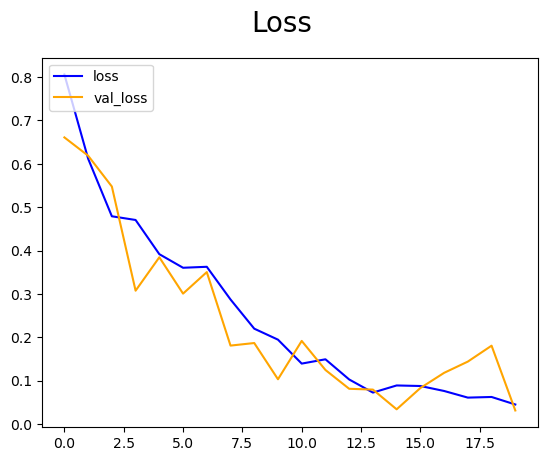

In [163]:
fig = plt.figure()
plt.plot(hist.history['loss'], color ='blue', label ='loss')
plt.plot(hist.history['val_loss'], color ='orange', label ='val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show();

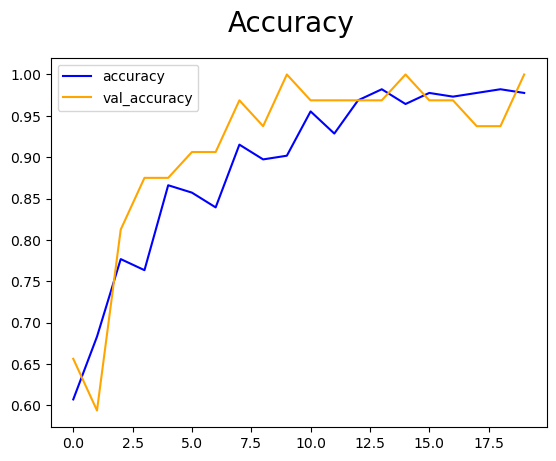

In [164]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color ='blue', label ='accuracy')
plt.plot(hist.history['val_accuracy'], color ='orange', label ='val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show();

# 4. Evaluation

## 4.1 Evaluate

In [165]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [166]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [167]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 138ms/step


In [168]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


## 4.2 Test

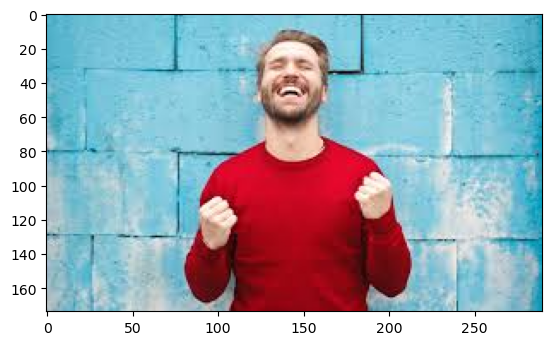

In [219]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [220]:
resize = tf.image.resize(img, (256,256))


In [221]:
print("Model Output Shape:", model.output_shape)

Model Output Shape: (None, 1)


In [222]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [223]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [224]:
yhat

array([[0.00426348]], dtype=float32)

In [225]:
if yhat > 0.5: 
    print(f'sad')
else:
    print(f'happy')

happy
